In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from typing_extensions import Text
dataset= pd.read_csv('/content/drive/MyDrive/4-1_Semester/CSE-404/Testing/Nashra/CAR-DETAILS-FROM-CAR-DEKHO.csv')
dataset.head()
list_drop = ['name']
dataset.drop(list_drop, axis=1, inplace=True)
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Categorical Plot

In [28]:
def Categorical_Plot(column):
    
        plt.figure(figsize=(20, 5))
        plt.subplot(1, 2,2)
        plt.scatter(dataset[column], dataset.selling_price)
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Selling_Price\n", fontsize = 15)
        plt.ylabel("Selling_Price\n", fontsize=15)

        plt.show()
        print()

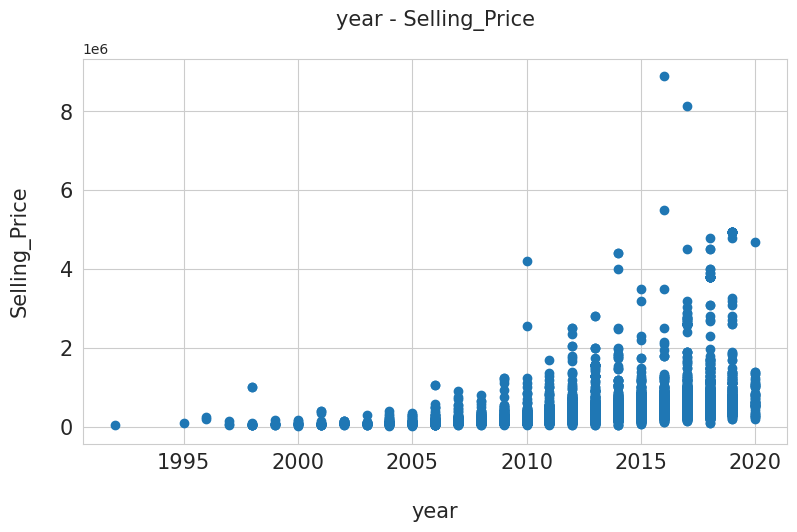

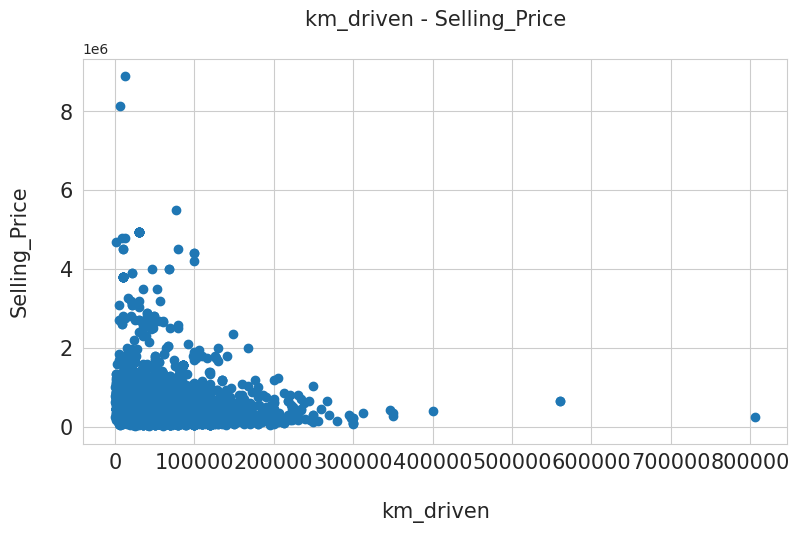

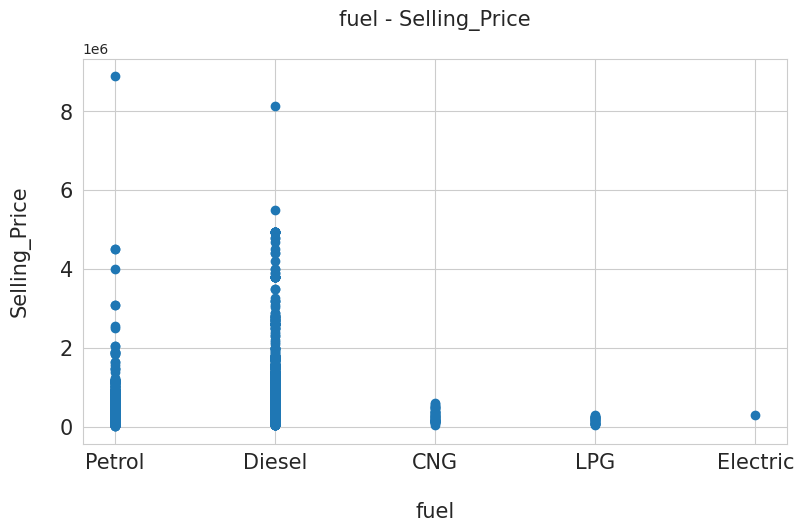

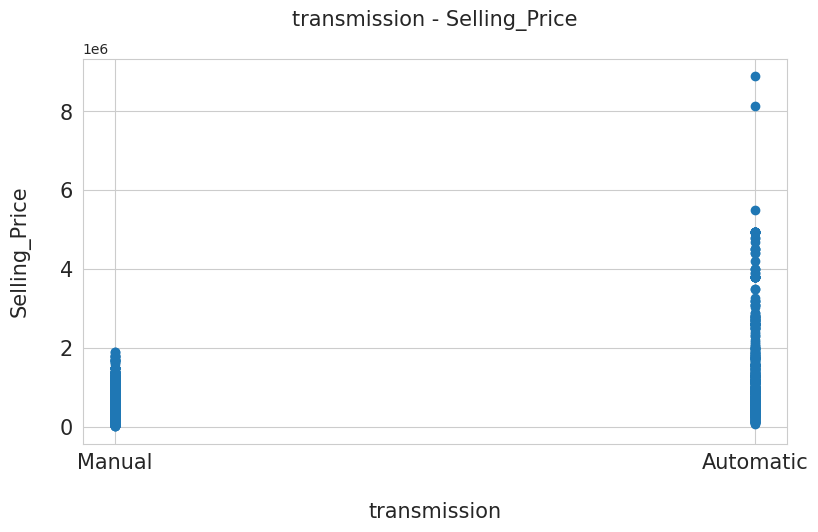

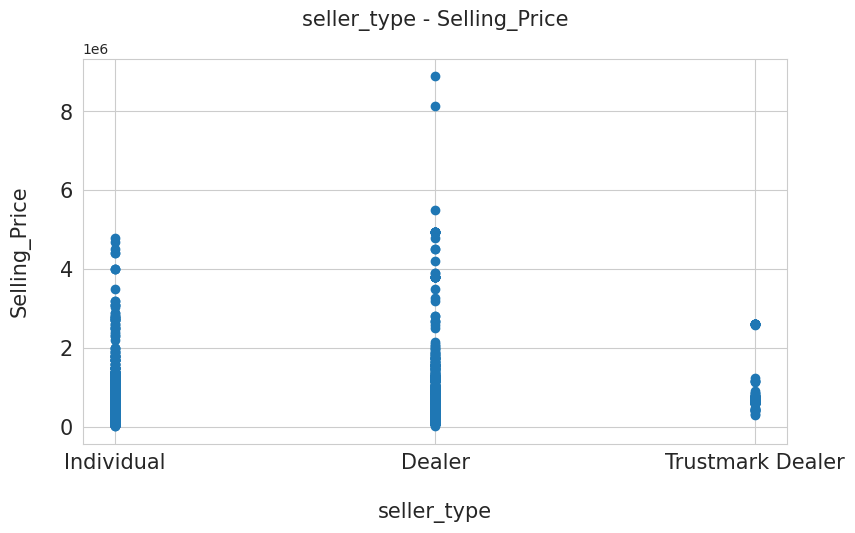

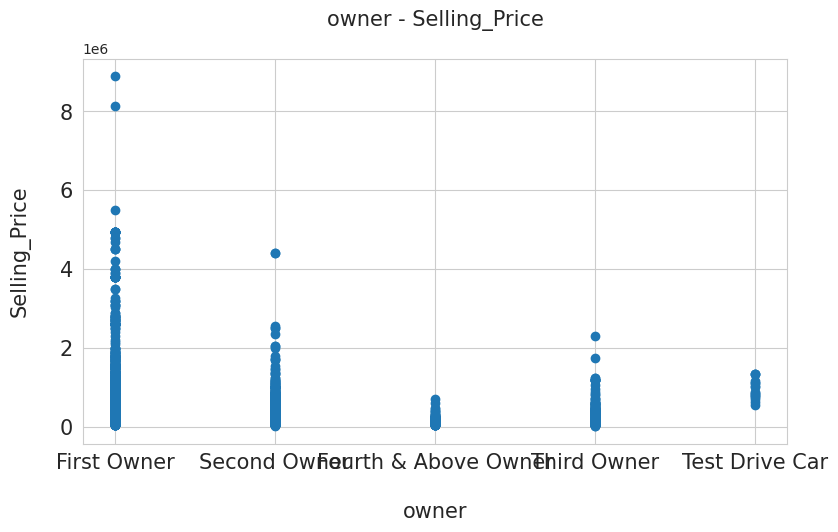

In [29]:
Categorical_Plot("year")
Categorical_Plot("km_driven")
Categorical_Plot("fuel")
Categorical_Plot("transmission")
Categorical_Plot("seller_type")
Categorical_Plot("owner")

In [30]:
dataset["fuel"].replace({'Petrol':2, 'Diesel':3, 'CNG':4, 'LPG':5},inplace = True)
dataset["seller_type"].replace({'Dealer':2, 'Individual':3, 'Trustmark Dealer':4}, inplace = True)
dataset["transmission"].replace({'Manual':2, 'Automatic':3}, inplace = True)
dataset["owner"].replace({'First Owner': 5, 'Second Owner': 4, 'Third Owner': 3,'Fourth & Above Owner': 2,'Test Drive Car': 1}, inplace = True)

dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,2,3,2,5
1,2007,135000,50000,2,3,2,5
2,2012,600000,100000,3,3,2,5
3,2017,250000,46000,2,3,2,5
4,2014,450000,141000,3,3,2,4


In [32]:
dataset.describe(include = 'all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4.340000e+03,4340.000000,4340.0,4340.000000,4340.000000,4340.00000
unique,NaN,NaN,NaN,5.0,NaN,NaN,NaN
top,NaN,NaN,NaN,3.0,NaN,NaN,NaN
freq,NaN,NaN,NaN,2153.0,NaN,NaN,NaN
mean,2013.090783,5.041273e+05,66215.777419,NaN,2.794470,2.103226,4.53341
std,4.215344,5.785487e+05,46644.102194,NaN,0.458629,0.304289,0.74033
min,1992.000000,2.000000e+04,1.000000,NaN,2.000000,2.000000,1.00000
25%,2011.000000,2.087498e+05,35000.000000,NaN,3.000000,2.000000,4.00000
50%,2014.000000,3.500000e+05,60000.000000,NaN,3.000000,2.000000,5.00000
75%,2016.000000,6.000000e+05,90000.000000,NaN,3.000000,2.000000,5.00000


<ipython-input-33-fcbba2bf63c0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.selling_price)


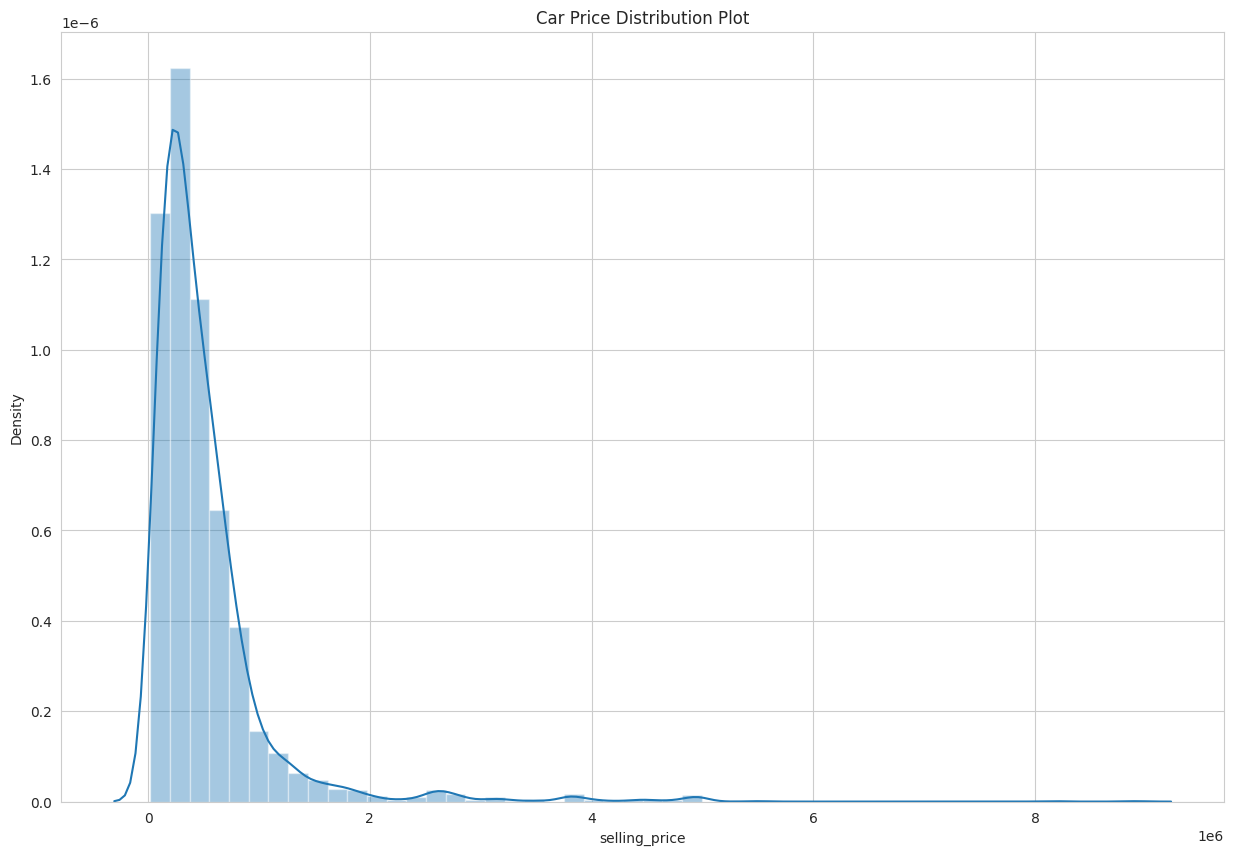

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
sns.distplot(dataset.selling_price)
plt.title('Car Price Distribution Plot')
plt.show()

In [34]:
x0,x1,x2,x3,x4,x5 = dataset['year'],dataset['seller_type'],dataset['km_driven'],dataset['fuel'],dataset['transmission'],dataset['owner']
X=[x0,x1,x2,x3,x4,x5]
y=dataset['selling_price']

In [35]:
global theta
theta= [1,1,1,1,1,1]

print(theta)
print("---------------")

[1, 1, 1, 1, 1, 1]
---------------


In [37]:
hypo=[]
start = 0
mid = 3472
end = mid+868
#stop=10

In [43]:
# hypothesis function
for i in range(0,100):
  for i in range(start,mid):
    #temp=[theta[0]]
    temp=[theta[j+1]*X[j][i] for j in range(1,5)]
    temp.append(theta[0])
    hypo.append(sum(temp))
    temp.clear
#   print("Hypothesis ------------")
#   print(hypo)
#   print("--------------")

#Error
  err = 0
  for i in range(start,mid):
    err = err + (hypo[i] - y[i])**2
  j=(err/(2*(mid-start)))
  print("-------------")
  print("Cost Function:  ",j)
  print("-------------")
    #return hypo
  alpha = 0.9
  Sum=[]
  temp=[]
  for i in range(start,mid):
        temp.append(hypo[i]-y[i])
  #temp= [hypo[i]-y[i] for i in range(start,mid)]
  Sum.append(sum(temp))
  temp.clear

  for j in range(1,6):
        for i in range(start,mid):
            temp.append((hypo[i]-y[i])*X[j][i])
    #temp=[(hypo[i]-y[i])*X[j][i] for i in range(start,mid)]
        Sum.append(sum(temp))
        temp.clear

  temp_theta = [theta[j]- (alpha*Sum[j]/(mid-start)) for j in range (len(theta))]
  theta.clear()
  theta = [round(x,5) for x in temp_theta]
  print("Update Theta = -----------------------")
  print(theta)
  print("---------------------------")
  hypo.clear
  Sum.clear

-------------
Cost Function:   271047114085.0811
-------------
Update Theta = -----------------------
[394760.99623, 1464033.03174, 18890484173.23162, 18891540150.39585, 18892460937.93148, 18894333420.38721]
---------------------------
-------------
Cost Function:   271047114085.0811
-------------
Update Theta = -----------------------
[789520.99246, 2928065.06348, 37780968345.46324, 37783080299.7917, 37784921874.86296, 37788666839.77442]
---------------------------
-------------
Cost Function:   271047114085.0811
-------------
Update Theta = -----------------------
[1184280.98869, 4392097.09522, 56671452517.69487, 56674620449.18755, 56677382811.79444, 56683000259.16164]
---------------------------
-------------
Cost Function:   271047114085.0811
-------------
Update Theta = -----------------------
[1579040.98492, 5856129.12696, 75561936689.9265, 75566160598.5834, 75569843748.72592, 75577333678.54884]
---------------------------
-------------
Cost Function:   271047114085.0811
--------